<a href="https://colab.research.google.com/github/kridtapon/TurtleSoup-Shift/blob/main/TurtleSoup_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Identify Turtle Soup signals (new 20-day lows or highs)
df['TurtleSoup_Low'] = df['Low'].rolling(window=10).min()  # New 20-day Low
df['TurtleSoup_High'] = df['High'].rolling(window=10).max()  # New 20-day High

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Entry Signal: TurtleSoup_Low and CTM > +50 (bullish trend)
df['Entry'] = (df['TurtleSoup_Low'] > df['TurtleSoup_Low'].shift(5))

# Exit Signal: TurtleSoup_High and CTM < -50 (bearish trend)
df['Exit'] = (df['TurtleSoup_High'] < df['TurtleSoup_High'].shift(5))

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  275032.060459
Total Return [%]                               175.03206
Benchmark Return [%]                          180.172878
Max Gross Exposure [%]                             100.0
Total Fees Paid                             11591.930805
Max Drawdown [%]                               38.605439
Max Drawdown Duration                  304 days 00:00:00
Total Trades                                          33
Total Closed Trades                                   33
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   45.454545
Best Trade [%]                                 47.776076
Worst Trade [%]                

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate TurtleSoup signals
def calculate_turtle_soup(df, window_low=10, window_high=10):
    df['TurtleSoup_Low'] = df['Low'].rolling(window=window_low).min()  # New 20-day Low
    df['TurtleSoup_High'] = df['High'].rolling(window=window_high).max()  # New 20-day High
    return df

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Apply the TurtleSoup signal calculation
df = calculate_turtle_soup(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Entry Signal: TurtleSoup_Low and CTM > +50 (bullish trend)
df['Entry'] = (df['TurtleSoup_Low'] > df['TurtleSoup_Low'].shift(5))

# Exit Signal: TurtleSoup_High and CTM < -50 (bearish trend)
df['Exit'] = (df['TurtleSoup_High'] < df['TurtleSoup_High'].shift(5))

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  275032.060459
Total Return [%]                               175.03206
Benchmark Return [%]                          180.172878
Max Gross Exposure [%]                             100.0
Total Fees Paid                             11591.930805
Max Drawdown [%]                               38.605439
Max Drawdown Duration                  304 days 00:00:00
Total Trades                                          33
Total Closed Trades                                   33
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   45.454545
Best Trade [%]                                 47.776076
Worst Trade [%]                

Streaming output truncated to the last 5000 lines.
<ipython-input-12-4fd9087382bd>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-4fd9087382bd>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-4fd9087382bd>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Parameters: Window Low: 13, Window High: 8, Shift: 1
Best Portfolio Total Return: 111.84306316724371


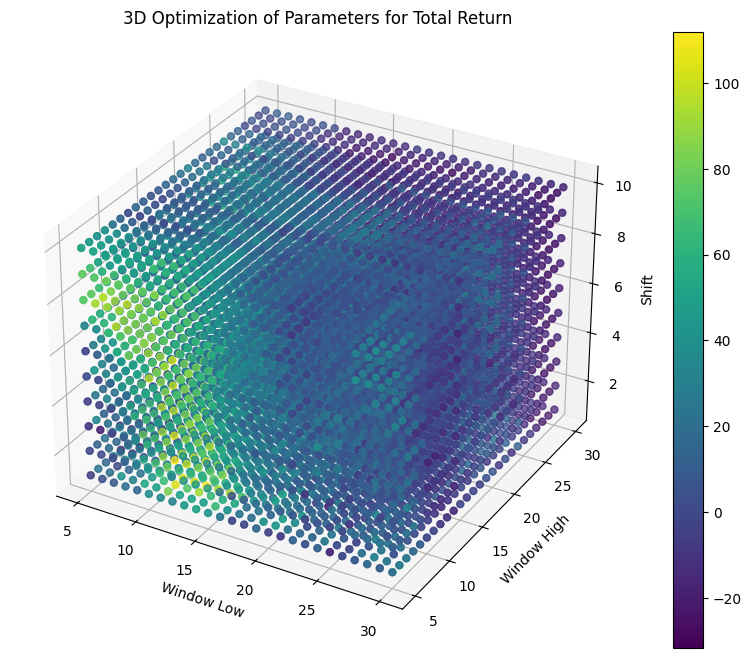

Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  211843.063167
Total Return [%]                              111.843063
Benchmark Return [%]                           85.218355
Max Gross Exposure [%]                             100.0
Total Fees Paid                             10841.567953
Max Drawdown [%]                               13.631311
Max Drawdown Duration                  224 days 00:00:00
Total Trades                                          37
Total Closed Trades                                   37
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   64.864865
Best Trade [%]                                 18.273488
Worst Trade [%]                

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate TurtleSoup signals
def calculate_turtle_soup(df, window_low=10, window_high=10):
    df['TurtleSoup_Low'] = df['Low'].rolling(window=window_low).min()  # New 20-day Low
    df['TurtleSoup_High'] = df['High'].rolling(window=window_high).max()  # New 20-day High
    return df

# Define the stock symbol and time period
symbol = 'PM'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define a function for backtesting with a set of parameters
def backtest_turtle_soup(window_low, window_high, shift):

    # calculate TurtleSoup
    df_test = df.copy()
    df_test = calculate_turtle_soup(df_test, window_low, window_high)

    # Filter data for the test period (2020-2025)
    df_signal = df_test[(df_test.index.year >= 2020) & (df_test.index.year <= 2025)]

    # Entry Signal: TurtleSoup_Low
    df_signal['Entry'] = (df_signal['TurtleSoup_Low'] > df_signal['TurtleSoup_Low'].shift(shift))

    # Exit Signal: TurtleSoup_High
    df_signal['Exit'] = (df_signal['TurtleSoup_High'] < df_signal['TurtleSoup_High'].shift(shift))

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_signal['Close'],
        entries=df_signal['Entry'],
        exits=df_signal['Exit'],
        init_cash=100_000,
        fees=0.001,
        freq='D'
    )
    return portfolio

# Define parameter ranges for optimization
window_low_range = range(5, 31)  # 5 to 30 days for window_low
window_high_range = range(5, 31)  # 5 to 30 days for window_high
shift_range = range(1, 11)  # 1 to 10 days for the shift

# Create all combinations of the parameters
param_grid = product(window_low_range, window_high_range, shift_range)

# Initialize variables to track the best result
best_return = -np.inf
best_params = None
best_portfolio = None

# Lists to store the results for 3D plotting
param_combinations = []
total_returns = []

# Loop through all parameter combinations
for window_low, window_high, shift in param_grid:
    portfolio = backtest_turtle_soup(window_low, window_high, shift)
    total_return = portfolio.stats()['Total Return [%]']

    # Store the results for 3D plotting
    param_combinations.append((window_low, window_high, shift))
    total_returns.append(total_return)

    # Check if this combination gives a better Total Return [%]
    if total_return > best_return:
        best_return = total_return
        best_params = (window_low, window_high, shift)
        best_portfolio = portfolio

# Print the best parameters and performance
print(f"Best Parameters: Window Low: {best_params[0]}, Window High: {best_params[1]}, Shift: {best_params[2]}")
print("Best Portfolio Total Return:", best_return)

# Plot 3D optimization surface for Total Return
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract parameter values for plotting
window_lows, window_highs, shifts = zip(*param_combinations)

# Create 3D scatter plot
ax.scatter(window_lows, window_highs, shifts, c=total_returns, cmap='viridis', s=25)
ax.set_xlabel('Window Low')
ax.set_ylabel('Window High')
ax.set_zlabel('Shift')
ax.set_title('3D Optimization of Parameters for Total Return')

# Show the 3D plot
plt.colorbar(ax.scatter(window_lows, window_highs, shifts, c=total_returns, cmap='viridis', s=25))
plt.show()

# Plot the equity curve of the best portfolio
best_portfolio.plot().show()

# Print portfolio stats
print(best_portfolio.stats())


[*********************100%***********************]  1 of 1 completed


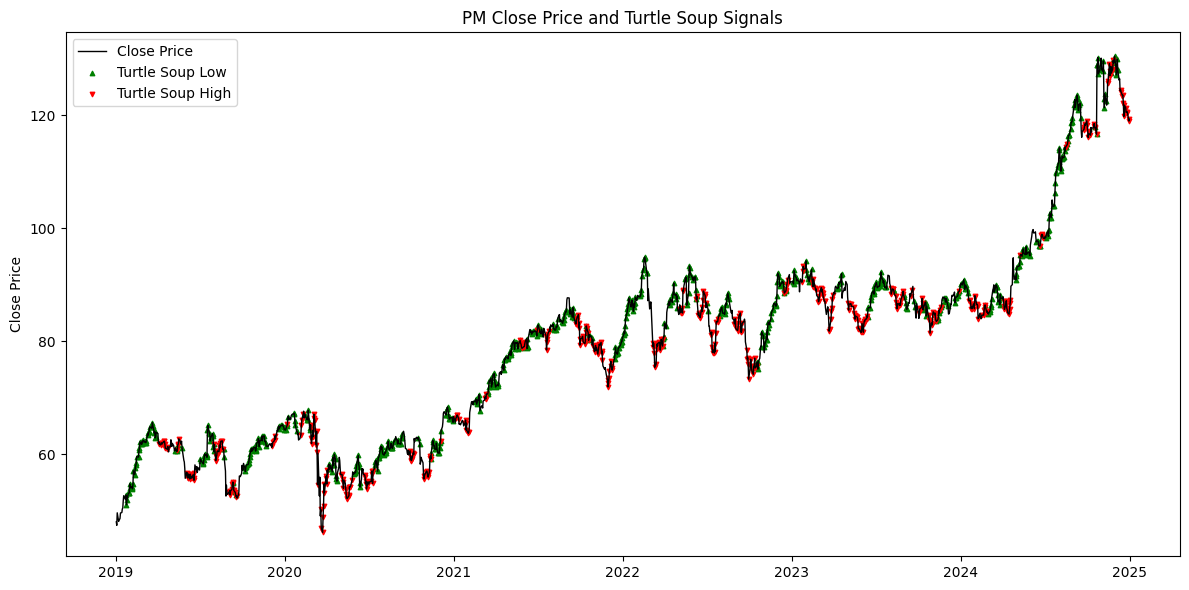

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol and time period
symbol = 'PM'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Identify Turtle Soup signals (new 20-day lows or highs)
df['TurtleSoup_Low'] = df['Low'].rolling(window=10).min()  # New 20-day Low
df['TurtleSoup_High'] = df['High'].rolling(window=10).max()  # New 20-day High

# Identify Turtle Soup signals (new 20-day lows or highs)
df['TurtleSoup_Low'] = df['TurtleSoup_Low'] > df['TurtleSoup_Low'].shift(5)  # New 20-day Low
df['TurtleSoup_High'] = df['TurtleSoup_High'] < df['TurtleSoup_High'].shift(5)  # New 20-day High

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Price
ax1.plot(df.index, df['Close'], label='Close Price', color='black', lw=1)
ax1.scatter(df.index[df['TurtleSoup_Low']], df['Close'][df['TurtleSoup_Low']], color='green', label='Turtle Soup Low', marker='^', alpha=1, s=10)
ax1.scatter(df.index[df['TurtleSoup_High']], df['Close'][df['TurtleSoup_High']], color='red', label='Turtle Soup High', marker='v', alpha=1, s=10)
ax1.set_title(f'{symbol} Close Price and Turtle Soup Signals')
ax1.set_ylabel('Close Price')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()
